Classification Report:
               precision    recall  f1-score   support

          OR       0.84      0.87      0.86       200
          CG       0.87      0.84      0.85       200

    accuracy                           0.85       400
   macro avg       0.86      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400



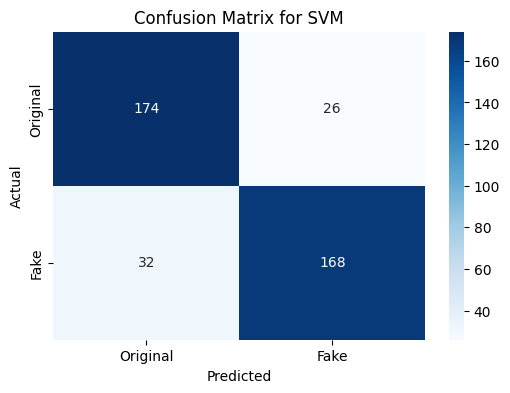

['tfidf_vectorizer.pkl']

In [2]:
# 1. Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# 2. Load dataset
df = pd.read_excel('review_2000_dataset.xlsx')

# 3. Encode label (CG = 1, OR = 0)
df['label'] = df['label'].map({'CG': 1, 'OR': 0})

# 4. Preprocessing
X = df['text']
y = df['label']

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 6. TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 7. Train SVM Model
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

# 8. Predict
y_pred = svm_model.predict(X_test_tfidf)

# 9. Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['OR', 'CG']))

# 10. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Original', 'Fake'], yticklabels=['Original', 'Fake'], cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

# 11. Save model and vectorizer
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


In [3]:
# 11. Save model and vectorizer
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']